# `Background` keyword

* **`Background`** is another keyword like **`Feature`** and **`Scenario`**.
* **`Background`** scetions is just like a Scenario section but only 1 **`Background`** section is allowed per Feature file.
* **`Background`** section is placed before the first Scenario.
* The **`Background`** runs before each Scenario BUT after **`before_scenario(context, scenario)`** method in **`environment.py`**.
* Just like **`before_scenario(context, scenario)`**, **`Background`** section is used to set up information before each scenario of the feature file.
* **Scope**:
* **`before_scenario(context, scenario)`** executes before each scenario of all feature files.
* **`Background`** executes before each scenario of the specific feature file where it is being defined, not all feature files.

**Example**:

```gherkin

Feature: Checkout with multiple items

    Background: Create a user with a valid credit card
        Given I create a new user
        And I add a valid credit card to the user

    Scenario: Subtotal should be correct
        Given I log in with the new user
        When I add 2 different items to my cart 
        Then the subtotal of my cart should be correct

    Scenario: Should see the list of items in the cart
        Given I log in with the new user
        When I add 2 different items to my cart 
        Then I should see the detailed list of my items in the cart

```

# Loading test data using `Background` & `context.table`

* Test cases often need test data.
* Behave allows to specify test data directly in your feature file using the **`Background`** section.
* In the **`Background`** section, you can specify the initial state of the data you want to start with.
* The only problem is that the data doesn’t load itself; you need to load it manually.
* You might ask, **“`How do I do that?`”**
* Luckily, Behave puts the data in a variable in the **`context`** called **`table`**.
* That means you can iterate over **`context.table`** and extract the data.

**EXAMPLE**:

---

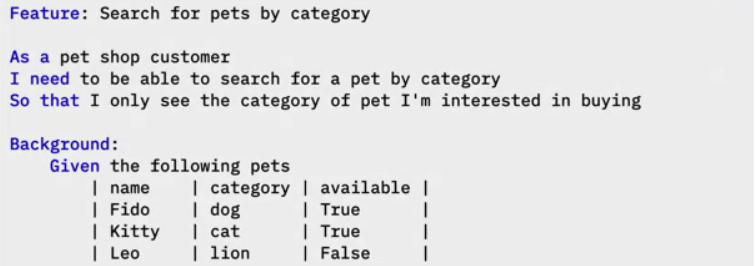

---

```python

@give("the following pets")
def step_impl(context):
    
    """Load the database with new pets"""
    
    for row in context.table:
        payload = {
            "name": row['name'],
            "category": row['category'],
            "available": row['available'] in ['True', 'true', '1']
        }
        
        context.resp = requests.post(
            f"{context.base_url}/pets",
            json=payload
        )

        assert context.resp.status_code is 201

```